# Problem Statement

Forecast the CocaCola prices  data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coca_df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
coca_df.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
coca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
coca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


***So,this plot is upward trending with Additive Seasonality.***

# Creating Dummy Variables

In [6]:
#We will extract Quarter values and Year values separately from 'Quarter column'
coca_df['Quarters']=0
coca_df['Year']=0
for i in range(42):
    p=coca_df["Quarter"][i]
    coca_df['Quarters'][i]=p[0:2]
    coca_df['Year'][i]=p[3:5]

C:\Users\Vaibhavi\AppData\Local\Temp\ipykernel_11760\1317477969.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca_df['Quarters'][i]=p[0:2]
C:\Users\Vaibhavi\AppData\Local\Temp\ipykernel_11760\1317477969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca_df['Year'][i]=p[3:5]


In [7]:
coca_df.head(10)

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [8]:
#Getting dummy variables for Q1,Q2,Q3,Q4
quarters_dummies = pd.DataFrame(pd.get_dummies(coca_df['Quarters']))
coca_df = pd.concat([coca_df,quarters_dummies],axis=1)
coca_df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

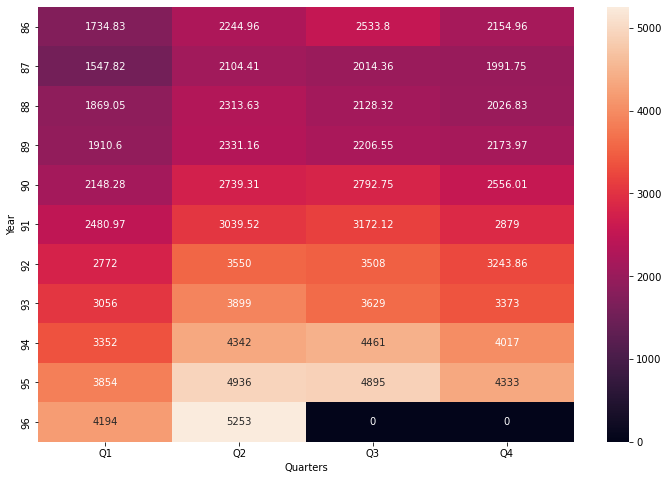

In [9]:
plt.figure(figsize=(12,8))
heatmap_y_year = pd.pivot_table(data=coca_df,values="Sales",index="Year",columns="Quarters",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True,fmt="g")

<AxesSubplot:xlabel='Year', ylabel='Sales'>

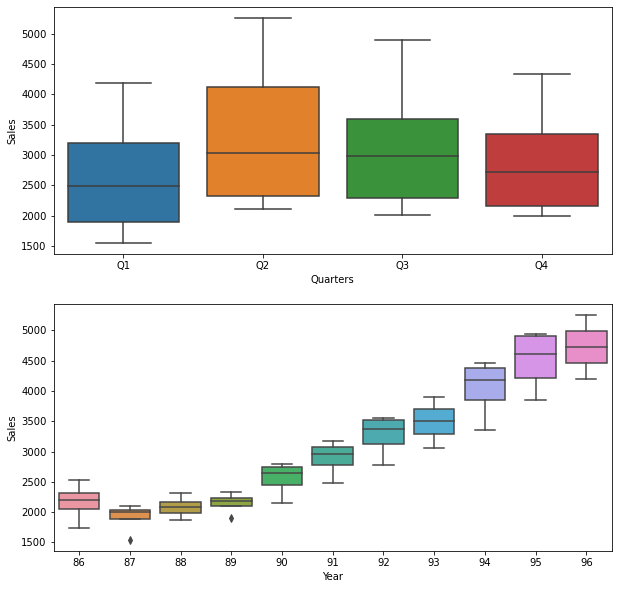

In [10]:
# Boxplot 
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(x='Quarters',y='Sales',data=coca_df)
plt.subplot(212)
sns.boxplot(x='Year',y='Sales', data=coca_df)

<AxesSubplot:>

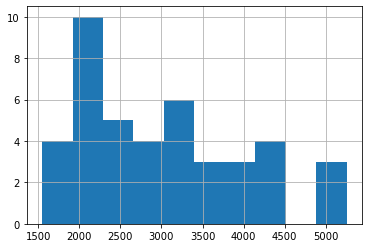

In [11]:
coca_df['Sales'].hist()

<AxesSubplot:>

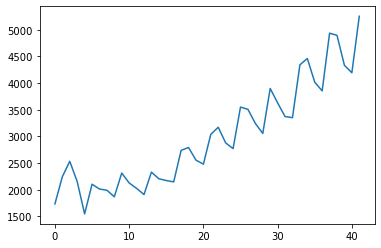

In [12]:
coca_df.Sales.plot()

<AxesSubplot:ylabel='Density'>

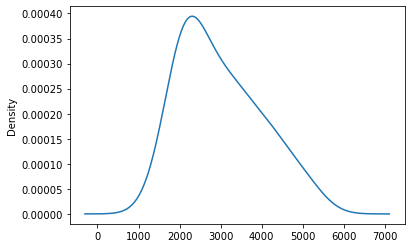

In [13]:
coca_df['Sales'].plot(kind='kde')

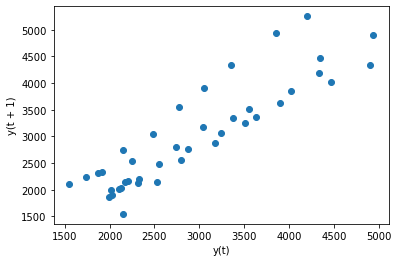

In [14]:
# create a scatter plot

from pandas.plotting import lag_plot
lag_plot(coca_df['Sales'])
plt.show()

# Splitting the Data

In [15]:
coca_train = coca_df.head(32)
coca_test =coca_df.tail(10)

# Moving Average

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing

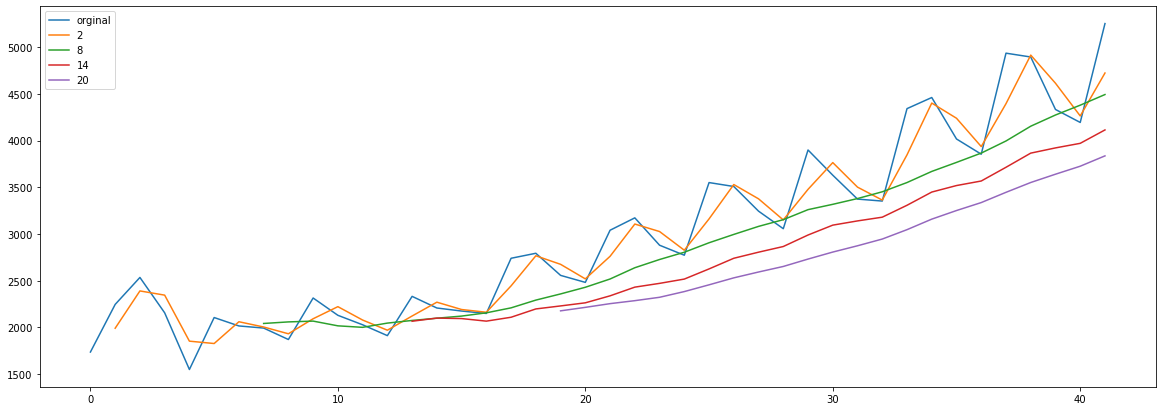

In [17]:
plt.figure(figsize=(20,7))
coca_df.Sales.plot(label="orginal")
for i in range(2,24,6):
    coca_df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

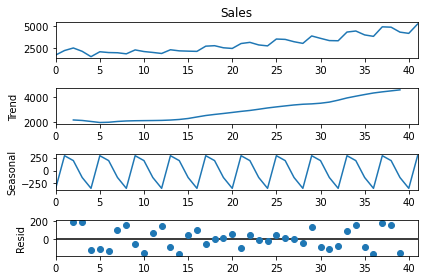

In [18]:
decompose_ts_add = seasonal_decompose(coca_df.Sales,period=4)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


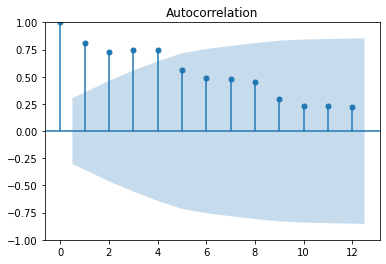

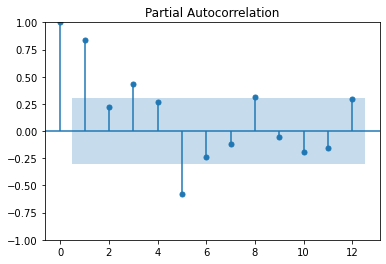

In [19]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca_df.Sales,lags=12)
tsa_plots.plot_pacf(coca_df.Sales,lags=12)
plt.show()

# Evaluation Metric MAPE and RMSE

In [20]:
import math

In [21]:
#Root Mean Square Error
def RMSE(pred,org):
    MSE = np.square(np.subtract(pred,org)).mean()  
    RMSE = math.sqrt(MSE)
    return RMSE

#Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [22]:
ses_model = SimpleExpSmoothing(coca_train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = coca_test.index[0],end = coca_test.index[-1])
MAPE(pred_ses,coca_test.Sales) 

22.724051812293908

In [23]:
RMSE(pred_ses,coca_test.Sales) 

1172.175645764459

# Holt method 

In [24]:
# Holt method 
hw_model = Holt(coca_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = coca_test.index[0],end = coca_test.index[-1])
MAPE(pred_hw,coca_test.Sales) 

C:\Users\Vaibhavi\AppData\Local\Temp\ipykernel_11760\3555206388.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(coca_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


16.720651186614596

In [25]:
RMSE(pred_hw,coca_test.Sales) 

888.7798745682837

# Holts winter exponential smoothing with additive seasonality and additive trend

In [26]:
hwe_model_add_add = ExponentialSmoothing(coca_train["Sales"],seasonal="add",trend="add",
                                         seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = coca_test.index[0],end = coca_test.index[-1])
MAPE(pred_hwe_add_add,coca_test.Sales) 

12.238699821765515

In [27]:
RMSE(pred_hwe_add_add,coca_test.Sales) 

610.227144270313

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [28]:
hwe_model_mul_add = ExponentialSmoothing(coca_train["Sales"],seasonal="mul",trend="add",
                                         seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = coca_test.index[0],end = coca_test.index[-1])
MAPE(pred_hwe_mul_add,coca_test.Sales)

12.198749596135075

In [29]:
RMSE(pred_hwe_mul_add,coca_test.Sales)

569.0540408448411

# Final Model by combining train and test

In [30]:
hwe_model_mul_add = ExponentialSmoothing(coca_df["Sales"],seasonal="mul",trend="add",
                                         seasonal_periods=4).fit()

In [31]:
pass_predicted=hwe_model_mul_add.forecast(10)
pass_predicted

42    5210.523237
43    4772.600600
44    4517.616864
45    5694.128928
46    5628.160583
47    5147.622526
48    4865.763475
49    6124.648114
50    6045.797928
51    5522.644451
dtype: float64

# Forecasting using SARIMA Model(Seasonal ARIMA) 

In [32]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [33]:
test_result=adfuller(coca_df['Sales'])

In [34]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [35]:
adfuller_test(coca_df['Sales'])

ADF Test Statistic : 1.3094210153268104
p-value : 0.9966611673930905
#Lags Used : 7
Number of Observations Used : 34
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:>

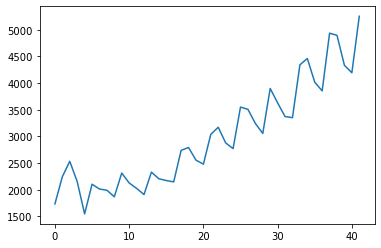

In [36]:
coca_df['Sales'].plot()

In [37]:
coca_df.head(8)

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1


***So,given time series is not sationary and also seasonal.We can see similar pattern is reapeating quaterly(4 months)***

In [38]:
coca_df['Seasonal First Difference']=coca_df['Sales']-coca_df['Sales'].shift(4)

In [39]:
coca_df

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,Seasonal First Difference
0,Q1_86,1734.827000,Q1,86,1,0,0,0,NaN
1,Q2_86,2244.960999,Q2,86,0,1,0,0,NaN
2,Q3_86,2533.804993,Q3,86,0,0,1,0,NaN
3,Q4_86,2154.962997,Q4,86,0,0,0,1,NaN
4,Q1_87,1547.818996,Q1,87,1,0,0,0,-187.008003
5,Q2_87,2104.411995,Q2,87,0,1,0,0,-140.549004
6,Q3_87,2014.362999,Q3,87,0,0,1,0,-519.441994
7,Q4_87,1991.746998,Q4,87,0,0,0,1,-163.216000
8,Q1_88,1869.049999,Q1,88,1,0,0,0,321.231003
9,Q2_88,2313.631996,Q2,88,0,1,0,0,209.220001


In [40]:
## Again test dickey fuller test
adfuller_test(coca_df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.6101117490935724
p-value : 0.09092533196680103
#Lags Used : 0
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:>

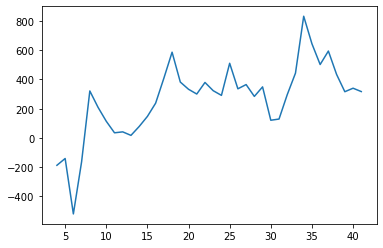

In [41]:
coca_df['Seasonal First Difference'].plot()

In [42]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


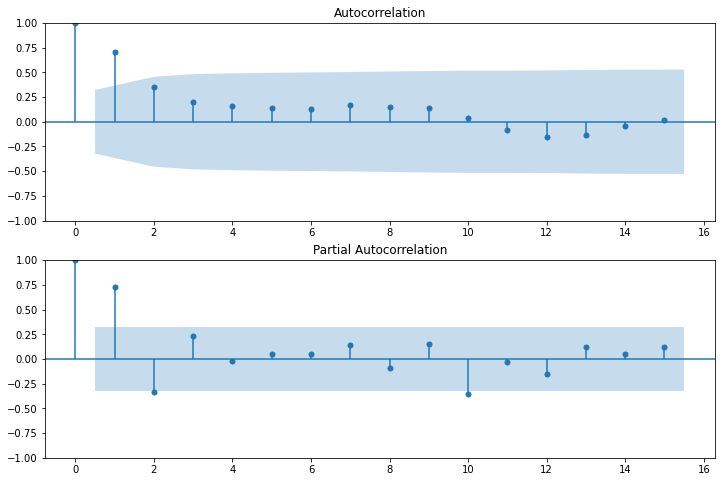

In [43]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(coca_df['Seasonal First Difference'].iloc[5:],lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(coca_df['Seasonal First Difference'].iloc[5:],lags=15,ax=ax2)

In [44]:
model=sm.tsa.statespace.SARIMAX(coca_df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
results=model.fit()

<AxesSubplot:>

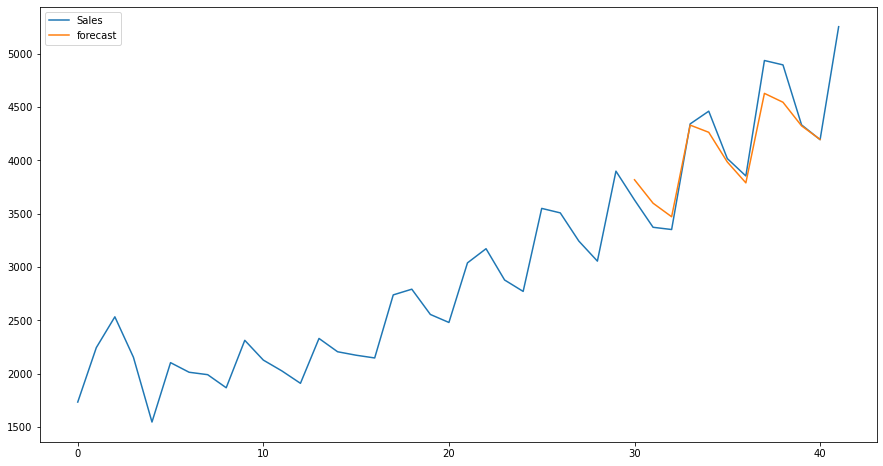

In [45]:
coca_df['forecast']=results.predict(start=30,end=40,dynamic=True)
coca_df[['Sales','forecast']].plot(figsize=(15,8))

In [46]:
#So using SARIMA ,forecasted values are closer to actual value